# **ETL**

## Objectives

- Load "insurance.csv" dataset downloaded from Kaggle 
- Briefly describe the dataset
- Clean the dataset i.e. deal with missing, duplicated, inconsistent or invalid values 
- Convert data into correct type and format
- Aggregate data to summarise charge prediction
- Save the modified dataset 

## Inputs

- insurance.csv
- Python libraries: Numpy; Pandas; Feature Engine; Matplotlib; Seaborn; Plotly

## Outputs

* Cleaned and transformed version: "df_transformed.csv"

## Comments

- All columns found to have valid data types and ranges/ values
- 'Charges' values capped at 2 decimal places
- No missing values found
- 1 duplicated row found and deleted
- Capitalised first letter of column headings, except 'bmi', which was fully capitalised
- Checked distributions: skewness, kurtosis, outliers
- Add 3 additional columns encoding 'Sex', 'Smoker' and 'Region' (kept originals for better plotting)



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Hamas\\AI\\AI_Projects\\Code_Institute_Projects\\hackathon_team3\\Hackathon2_project_team3\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Hamas\\AI\\AI_Projects\\Code_Institute_Projects\\hackathon_team3\\Hackathon2_project_team3'

---

# Load the Dataset

Before loading the dataset, I will install the required Python libraries.

In [4]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from feature_engine.imputation import CategoricalImputer
import matplotlib.pyplot as plt
import seaborn as sns

Now I will load the dataset which is saved in this directory under Dataset/ Raw.

In [5]:
df = pd.read_csv("Dataset/Raw/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


---

# Initial Exploration and Cleaning

Next, I will look at the basic characteristics of the dataset including, size, data types and summary statistics of the dataset.

In [6]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


This shows that the DataFrame has 7 columns and 1338 rows, which should correspond to 1338 separate individuals. I will check for duplicate rows when I clean the dataset. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


I can see that we have the expected data types, with **age** and number of **children** columns being integers; **bmi** and **charges** being floats; and the categorical data **sex**, **smoker** and **region** being objects. We will encode the categorical data at a later point to aid in exploratory data analysis (EDA).

I will look at summary statistics on the numerical data next. 

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


I can see that **age**, **bmi** and **children** columns have valid ranges, for example, a minimum age of 18 years old and maximum of 64.

I am going to limit the **charges** column to 2 decimal places, as this is the standard way to view/ represent currency.

In [9]:
df["charges"] = df["charges"].round(2)

In [10]:
df["charges"]

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.94
1337    29141.36
Name: charges, Length: 1338, dtype: float64

Next, I will look at the unique values of the categorical data. While the column **children** is numerical, I will change it to "object" for this exercise, before changing it back to "int". 

In [11]:
df["children"] = df["children"].astype("object")
df["children"].dtype

dtype('O')

In [12]:
for col in df.select_dtypes("object"):
    print(f'{col}: {df[col].unique()}')

sex: ['female' 'male']
children: [0 1 3 2 5 4]
smoker: ['yes' 'no']
region: ['southwest' 'southeast' 'northwest' 'northeast']


I can see that there are only expected and valid values for each of these categorical variables. 

I would also like to see the number of counts for each value of the categorical variables, both as the absolute number and proportion of the total.

In [13]:
for col in df.select_dtypes("object"):
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True))

sex
male      676
female    662
Name: count, dtype: int64
sex
male      0.505232
female    0.494768
Name: proportion, dtype: float64
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
children
0    0.428999
1    0.242152
2    0.179372
3    0.117339
4    0.018685
5    0.013453
Name: proportion, dtype: float64
smoker
no     1064
yes     274
Name: count, dtype: int64
smoker
no     0.795217
yes    0.204783
Name: proportion, dtype: float64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
region
southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: proportion, dtype: float64


I can see that these data appear valid. There are ~20 % smokers and ~80 % non-smokers; there is almost equal representation from all 4 regions; and ~40 % of the people have no children and this percentage decreases as the number of chidrem increases.

I will return **children** back to the "int" data type.

In [14]:
df["children"] = df["children"].astype("int")
df["children"].dtype

dtype('int32')

Next, I am going to see if there are any missing  values.

In [15]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

This shows that there are no missing values, and I have already shown that categorical and numerical values all appear valid. 

Next, I will check for duplicated rows below.

In [16]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.56


There is one duplicated row that needs to be deleted; I can use the index (581) to delete it.

In [17]:
df = df.drop(581)

I will double check that the deletion has worked as expected.

In [18]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges


In [19]:
df.shape

(1337, 7)

I can see that the duplication doesn't show anymore and the DataFrame has one less row than before, so I can conclude that the deletion worked as expected.

Lastly, I would like to capitalise the first letter of the headings, except for **bmi** which I will change to all capitals, to reflect standard expression of the abreviation for "body mass index". 

In [20]:
df.columns = df.columns.str.capitalize()
df.columns = [col if col != "Bmi" else "BMI" for col in df.columns]

In [21]:
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,19,female,27.900,0,yes,southwest,16884.92
1,18,male,33.770,1,no,southeast,1725.55
2,28,male,33.000,3,no,southeast,4449.46
3,33,male,22.705,0,no,northwest,21984.47
4,32,male,28.880,0,no,northwest,3866.86


The dataset has been cleaned and validated and is ready for transformations that will aide our business model and hypothesis testing.

---

# Transformations

We intend to use this data to model and predict health insurance costs. I will have a look at the histogram and outliers in the **Age**, **BMI** and **Charges** features, and also summarise skewness and kurtosis.

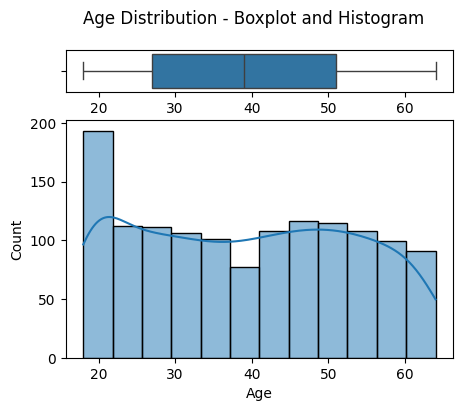

This is the range where a data point is not an outlier: from -9.0 to 87.0




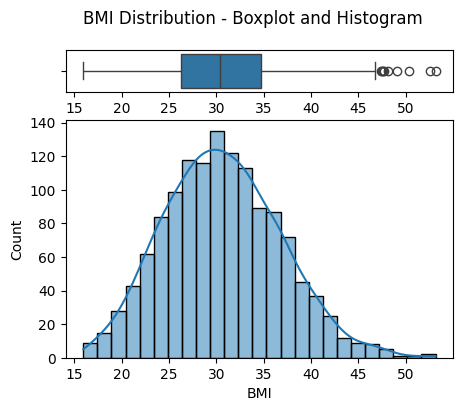

This is the range where a data point is not an outlier: from 13.67 to 47.32




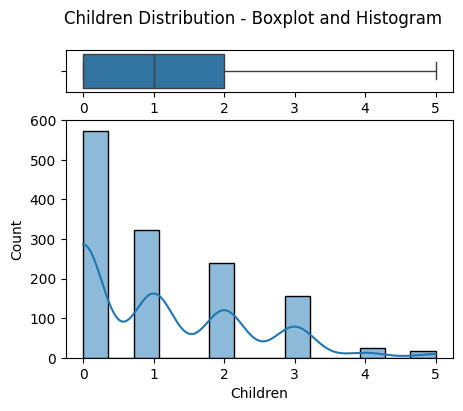

This is the range where a data point is not an outlier: from -3.0 to 5.0




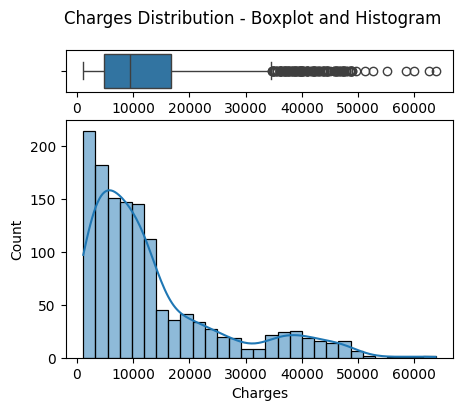

This is the range where a data point is not an outlier: from -13120.73 to 34524.79


 Age | skewness: 0.05 | kurtosis: -1.24
 BMI | skewness: 0.28 | kurtosis: -0.05
 Children | skewness: 0.94 | kurtosis: 0.2
 Charges | skewness: 1.52 | kurtosis: 1.6


In [22]:
def plot_histogram_and_boxplot(df):
  for col in df.select_dtypes(include='number').columns:
    fig, axes = plt.subplots(nrows=2 ,ncols=1 ,figsize=(5,4), gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(data=df, x=col, ax=axes[0])
    sns.histplot(data=df, x=col, kde=True, ax=axes[1])
    fig.suptitle(f"{col} Distribution - Boxplot and Histogram")
    plt.show()

    IQR = df[col].quantile(q=0.75) - df[col].quantile(q=0.25)
    print(
        f"This is the range where a data point is not an outlier: from "
        f"{(df[col].quantile(q=0.25) - 1.5*IQR).round(2)} to "
        f"{(df[col].quantile(q=0.75) + 1.5*IQR).round(2)}")
    print("\n")

def calculate_skew_kurtosis(df, col):
  for col in df.select_dtypes(include='number').columns:
    print(f" {col} | skewness: {df[col].skew().round(2)} | kurtosis: {df[col].kurtosis().round(2)}")

plot_histogram_and_boxplot(df)
calculate_skew_kurtosis(df, col)

We will ignore **Children** for now, as although it is numerical, it's really a categorical variable.

I can see that ages are mostly evenly distributed (skewness = 0.05) , with a small peak at 18 - 20 year olds (kurtosis = - 1.24); **BMI** has a small positive skew (0.28) with some outliers at the higher end (kurtosis = 0.2); while **Charges** has extreme positive skewedness (1.52), with large tails (kurtosis = 1.6), representing that most charges are under ~ $12,000 in value, but there are many higher value charges, and many outliers at the extreme high end.

This information is important to know. However, we will not be cutting or capping these outliers because we want to account for them in our model. They likely represent natural variations in health and life event such as illenesses and accidents, which affect health insurance charges. 

I will encode the categorical features: **Sex**, **Smoker** and **Region** which could be useful in more indepth analysis. However, I'm going to add the encoded features as new columns rather than replace them, because having the original values in categorical features often makes the plots more understandable.

In [23]:
from feature_engine.encoding import OrdinalEncoder

# asked Co-pilot for help with this code
# select categoric data to encode
categorical_cols = ["Sex", "Smoker", "Region"]

# duplicate selected columns and add "-enc" to the names
for col in categorical_cols:
    df[col + "_enc"] = df[col]

# create a pipeline with OrdinalEncoder for only the duplicated ones
pipeline = Pipeline([
    ("encoder", OrdinalEncoder(variables=[col + "_enc" for col in categorical_cols],
                               encoding_method="arbitrary"))
])

# fit + transform
df_transformed = pipeline.fit_transform(df)

df_transformed

c:\Hamas\AI\AI_Projects\Code_Institute_Projects\hackathon_team3\Hackathon2_project_team3\.venv\Lib\site-packages\feature_engine\encoding\base_encoder.py:223: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(X[feature]):
c:\Hamas\AI\AI_Projects\Code_Institute_Projects\hackathon_team3\Hackathon2_project_team3\.venv\Lib\site-packages\feature_engine\encoding\base_encoder.py:223: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(X[feature]):
c:\Hamas\AI\AI_Projects\Code_Institute_Projects\hackathon_team3\Hackathon2_project_team3\.venv\Lib\site-packages\feature_engine\encoding\base_encoder.py:223: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if 

,Age,Sex,BMI,Children,Smoker,Region,Charges,Sex_enc,Smoker_enc,Region_enc
0,19,female,27.900,0,yes,southwest,16884.92,0,0,0
1,18,male,33.770,1,no,southeast,1725.55,1,1,1
2,28,male,33.000,3,no,southeast,4449.46,1,1,1
3,33,male,22.705,0,no,northwest,21984.47,1,1,2
4,32,male,28.880,0,no,northwest,3866.86,1,1,2
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.55,1,1,2
1334,18,female,31.920,0,no,northeast,2205.98,0,1,3
1335,18,female,36.850,0,no,southeast,1629.83,0,1,1
1336,21,female,25.800,0,no,southwest,2007.94,0,1,0


This is all the transformations that we will do at this point. We may do more after EDA.

I will now save the transformed DataFrame.

In [24]:
df_transformed.to_csv("Dataset/Cleaned/df_transformed.csv", index=False)

---

# Conclusions and Next Steps:

### Conclusions:

* The dataset has been loaded and explored. 
* Some data cleaning steps were taken such as checking for missing values (none found), removing one duplicate row and validating data types 
* Charges column was rounded to 2 decimal places for consistency and currency has only 2 decimal places
* Column names were standardized with Uppercasing the initial letter and "BMI"
* Categorical Variables were encoded for further analysis and appended onto the dataset as new columns
* Cleaned and transformed dataset saved into new dataset.


###  Next Steps:

* Use the cleaned dataset to perform EDA and uncover patterns and relationships within the data
* Visualise the distributions and correlations between features and the target variable (Charges)
* Add additional features if needed 
* Create a model to show whether a person is low, moderate or high risk